In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Generate random 5x5 dataframe
df = pd.DataFrame(np.random.randint(-10,10, size=(5,5)))

In [2]:
df_test = pd.DataFrame()
df_test['input'] = df.stack().values
mean = df_test['input'].mean()
std = df_test['input'].std()

# Activation after BN
comp = []
for k, v in df_test.iterrows():
    comp.append(v.input-mean)

df_test['vkmean'] = comp

batch_norm = []
for k, v in df_test.iterrows():
    batch_norm.append(v.input - v.vkmean/std)

df_test['bachnorm'] = batch_norm

relu = []
for k, v in df_test.iterrows():
    if v.bachnorm > 0:
        relu.append(v.bachnorm)
    else:
        relu.append(0)

df_test['relu'] = relu

df_test


,input,vkmean,bachnorm,relu
0,-4,-3.52,-3.377032,0.000000
1,9,9.48,7.322233,7.322233
2,4,4.48,3.207131,3.207131
3,0,0.48,-0.084950,0.000000
4,-3,-2.52,-2.554011,0.000000
5,-4,-3.52,-3.377032,0.000000
6,8,8.48,6.499213,6.499213
7,0,0.48,-0.084950,0.000000
8,0,0.48,-0.084950,0.000000
9,-7,-6.52,-5.846093,0.000000


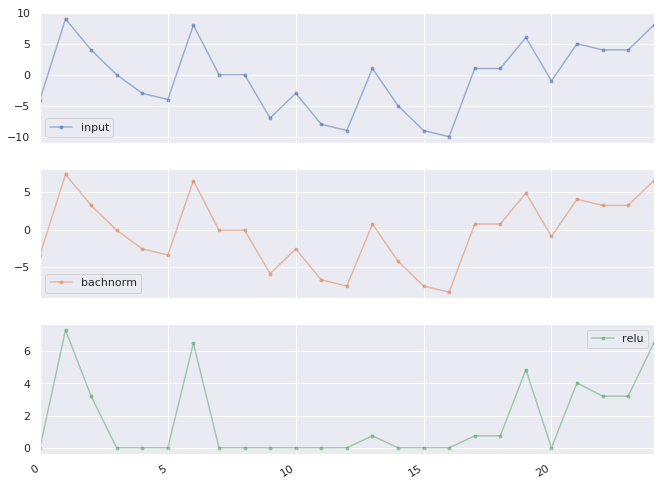

In [3]:
# Batchnormalization before activation
sns.set(rc={'figure.figsize':(15, 5)})
# df_test["input"].plot(linewidth=0.8)
# df_test['bachnorm'].plot(linewidth=0.8)
cols_p_t = ['input', 'bachnorm', 'relu']
axes = df_test[cols_p_t].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)

In [4]:
# Activation before Relu

df_test_2 = df_test.drop(['vkmean', 'bachnorm', 'relu'], axis=1)
relu_2 = []
for k, v in df_test_2.iterrows():
    if v.input > 0:
        relu_2.append(v.input)
    else:
        relu_2.append(0)

df_test_2['relu_before'] = relu_2
mean_2 = df_test_2['relu_before'].mean()
std_2 = df_test_2['relu_before'].std()
comp_2 = []
for k, v in df_test_2.iterrows():
    comp_2.append(v.relu_before-mean_2)

df_test_2['vkmean_2'] = comp_2

batch_norm_2 = []
for k, v in df_test_2.iterrows():
    batch_norm_2.append(v.relu_before - v.vkmean_2/std_2)

df_test_2['bachnorm_2'] = batch_norm_2
df_test_2

,input,relu_before,vkmean_2,bachnorm_2
0,-4,0,-2.04,0.678494
1,9,9,6.96,6.685138
2,4,4,1.96,3.348114
3,0,0,-2.04,0.678494
4,-3,0,-2.04,0.678494
5,-4,0,-2.04,0.678494
6,8,8,5.96,6.017733
7,0,0,-2.04,0.678494
8,0,0,-2.04,0.678494
9,-7,0,-2.04,0.678494


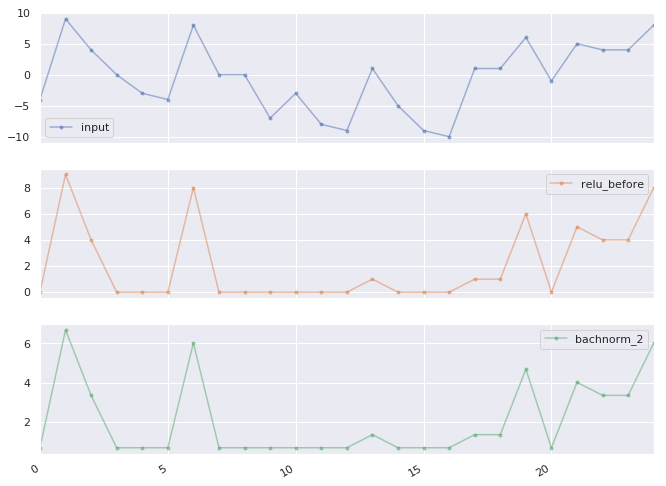

In [5]:
sns.set(rc={'figure.figsize':(15, 5)})
# df_test["input"].plot(linewidth=0.8)
# df_test['bachnorm'].plot(linewidth=0.8)
cols_p_t = ['input', 'relu_before', 'bachnorm_2']
axes = df_test_2[cols_p_t].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)

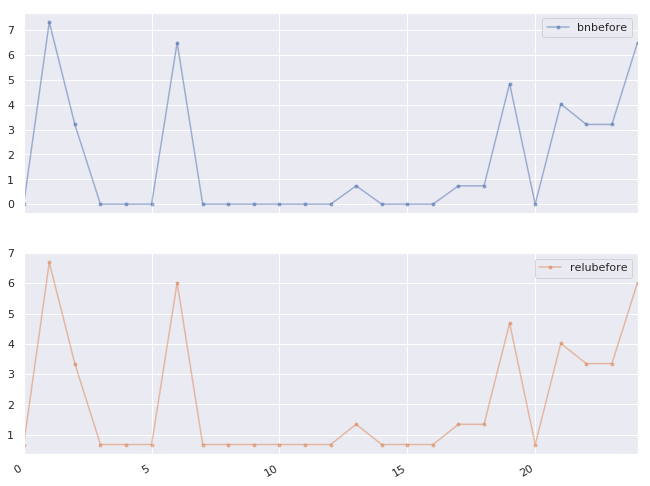

In [6]:
df_output = pd.DataFrame()
df_output['bnbefore'] = df_test['relu']
df_output['relubefore'] = df_test_2['bachnorm_2']
cols_p_t2 = ['bnbefore', 'relubefore']
axes2 = df_output[cols_p_t2].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
# sns.set(rc={'figure.figsize':(15, 5)})
# df_test["relu"].plot(linewidth=0.8, )
# df_test_2['bachnorm'].plot(linewidth=0.8)

In [7]:
import skimage.measure
np_test = np.array(df_test['relu']).reshape(5,5)
np_test_2 = np.array(df_test_2['bachnorm_2']).reshape(5,5)
max_np_test = skimage.measure.block_reduce(np_test, (2,2), np.max)
max_np_test2 = skimage.measure.block_reduce(np_test_2, (2,2), np.max)
df_max_relu = pd.DataFrame(max_np_test)
df_max_batchnorm = pd.DataFrame(max_np_test2)
df_max_stack = pd.DataFrame()
df_max_stack['max_relu'] = df_max_relu.stack().values
df_max_stack['max_batch'] = df_max_batchnorm.stack().values


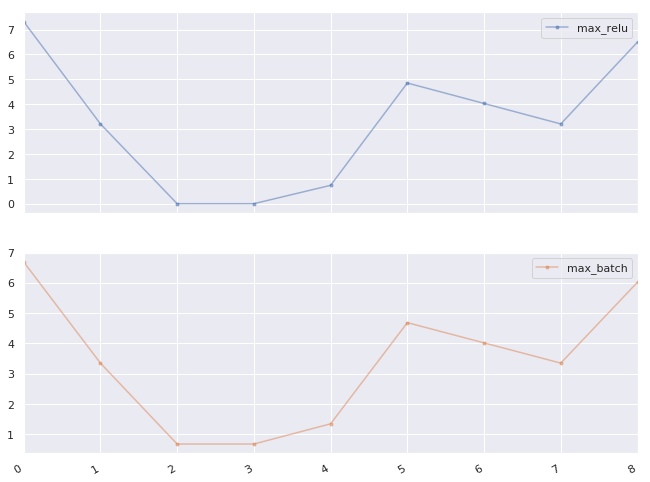

In [8]:
sns.set(rc={'figure.figsize':(15, 5)})
cols_max = ['max_relu', 'max_batch']
axes_max = df_max_stack[cols_max].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)

In [9]:
df_max_stack
# df_test.to_csv("bn_before_relu.csv", index=False)
# df_test_2.to_csv("relu_vegore_bn.csv", index=False)

,max_relu,max_batch
0,7.322233,6.685138
1,3.207131,3.348114
2,0.000000,0.678494
3,0.000000,0.678494
4,0.738070,1.345899
5,4.853172,4.682924
6,4.030152,4.015519
7,3.207131,3.348114
8,6.499213,6.017733
